**Table of Contents** <br>
* [1. Import Libraries and Dataset](#importld)
* [2. Perspectives](#perspectives)

<hr>
<a class="anchor" id="importld">
    
# 1. Import Libraries and Dataset
    
</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [2]:
df = pd.read_csv('datasets/data_clean.csv')

<hr>
<a class="anchor" id="importdataset">
    
# 2. Perspectives
    
</a>

In [3]:
df.head()

,customer_age,vendor_count,is_chain,Total_Spent,Spent_Per_Order,Items_Per_Order,Frequency,CUI_diversity,Loyalty,Time_with_us,...,Breakfast,Early_Lunch,Late_Lunch,Dinner,Weekdays,Weekends,Asian,Western_Other,Drinks_Snacks,Healthy
0,0.107143,0.142857,0.166667,0.306394,0.578417,1.0,0.717691,0.0,0.0,0.011111,...,0.0,0.0,0.0,1.0,0.000000,0.666667,0.528696,0.000000,0.0,0.0
1,0.071429,0.142857,0.333333,0.202472,0.379445,0.0,0.717691,0.2,0.0,0.011111,...,0.5,0.5,0.0,0.0,0.000000,0.666667,0.116979,0.307066,0.0,0.0
2,0.821429,0.000000,0.333333,0.094895,0.173895,0.0,0.717691,0.0,0.6,0.011111,...,0.5,0.5,0.0,0.0,0.000000,0.666667,0.000000,0.220359,0.0,0.0
3,0.428571,0.142857,0.166667,0.335196,0.633505,0.4,0.473024,0.2,0.0,0.022222,...,0.0,0.5,0.2,0.0,0.166667,0.333333,0.577757,0.000000,0.0,0.0
4,0.178571,0.142857,0.000000,0.591832,1.000000,1.0,0.473024,0.2,0.0,0.022222,...,1.0,0.0,0.0,0.0,0.166667,0.333333,0.748192,0.348982,0.0,0.0


In [4]:
df.columns

Index(['customer_age', 'vendor_count', 'is_chain', 'Total_Spent',
       'Spent_Per_Order', 'Items_Per_Order', 'Frequency', 'CUI_diversity',
       'Loyalty', 'Time_with_us', 'Night', 'Breakfast', 'Early_Lunch',
       'Late_Lunch', 'Dinner', 'Weekdays', 'Weekends', 'Asian',
       'Western_Other', 'Drinks_Snacks', 'Healthy'],
      dtype='object')

In [4]:
# Split variables into perspectives
behavior_features = [
    'Frequency',
    'Total_Spent',
    'Spent_Per_Order', 
    'Loyalty', 
    'Time_with_us'
]

time_features = [
    'Night', 'Breakfast', 'Lunch', 'Dinner' 
]

preferences_features = [
    'Asian', 'Fast_food', 'Chicken_pasta','Drinks_snacks', 'Healthy_other' 
]

df_beh = df[behavior_features]
df_time = df[time_features]
df_pref = df[preferences_features]

<hr>
<a class="anchor" id="hclustering">
    
# 3. Hierarchical Clustering
    
</a>

In [5]:
# Performing HC on df_beh
hclust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
hc_labels = hclust.fit_predict(df_beh)
hc_labels

array([2, 1, 0, ..., 4, 4, 4])

In [6]:
# Performing HC on df_time
hclust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
hc_labels2 = hclust.fit_predict(df_beh)
hc_labels2

array([2, 1, 0, ..., 4, 4, 4])

In [7]:
# Performing HC on df_pref
hclust = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
hc_labels3 = hclust.fit_predict(df_beh)
hc_labels3

array([2, 1, 0, ..., 4, 4, 4])

In [8]:
# Characterizing the clusters
df_concat = pd.concat((df, pd.Series(hc_labels, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

,customer_age,vendor_count,is_chain,Total_Spent,Spent_Per_Order,Items_Per_Order,Frequency,CUI_diversity,Loyalty,Time_with_us,...,Breakfast,Early_Lunch,Late_Lunch,Dinner,Weekdays,Weekends,Asian,Western_Other,Drinks_Snacks,Healthy
labels,,,,,,,,,,,,,,,,,,,,,
0,0.442080,0.237052,0.477236,0.370132,0.277423,0.140475,0.091923,0.221215,0.539918,0.541430,...,0.309241,0.386772,0.327266,0.359051,0.461139,0.601772,0.239746,0.333543,0.168849,0.068608
1,0.435286,0.259144,0.327606,0.207426,0.270948,0.091835,0.109370,0.258148,0.008369,0.397780,...,0.241556,0.285664,0.148418,0.293812,0.259172,0.419186,0.155383,0.171308,0.186073,0.069910
2,0.436027,0.173907,0.206407,0.473025,0.738256,0.646281,0.318384,0.143817,0.093135,0.262371,...,0.265175,0.210197,0.119717,0.115379,0.228222,0.365366,0.366838,0.201190,0.365554,0.033439
3,0.437380,0.864460,0.873156,0.731123,0.302974,0.251236,0.118176,0.754202,0.298001,0.773087,...,0.582297,0.701144,0.491447,0.619219,0.820073,0.901293,0.529975,0.553746,0.472791,0.172551
4,0.437781,0.000000,0.104114,0.097465,0.372833,0.000000,0.710451,0.000000,0.000000,0.000878,...,0.092502,0.093670,0.059983,0.098237,0.086095,0.161144,0.079110,0.078303,0.094660,0.025276


In [9]:
# Characterizing the clusters
df_concat = pd.concat((df, pd.Series(hc_labels2, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

,customer_age,vendor_count,is_chain,Total_Spent,Spent_Per_Order,Items_Per_Order,Frequency,CUI_diversity,Loyalty,Time_with_us,...,Breakfast,Early_Lunch,Late_Lunch,Dinner,Weekdays,Weekends,Asian,Western_Other,Drinks_Snacks,Healthy
labels,,,,,,,,,,,,,,,,,,,,,
0,0.442080,0.237052,0.477236,0.370132,0.277423,0.140475,0.091923,0.221215,0.539918,0.541430,...,0.309241,0.386772,0.327266,0.359051,0.461139,0.601772,0.239746,0.333543,0.168849,0.068608
1,0.435286,0.259144,0.327606,0.207426,0.270948,0.091835,0.109370,0.258148,0.008369,0.397780,...,0.241556,0.285664,0.148418,0.293812,0.259172,0.419186,0.155383,0.171308,0.186073,0.069910
2,0.436027,0.173907,0.206407,0.473025,0.738256,0.646281,0.318384,0.143817,0.093135,0.262371,...,0.265175,0.210197,0.119717,0.115379,0.228222,0.365366,0.366838,0.201190,0.365554,0.033439
3,0.437380,0.864460,0.873156,0.731123,0.302974,0.251236,0.118176,0.754202,0.298001,0.773087,...,0.582297,0.701144,0.491447,0.619219,0.820073,0.901293,0.529975,0.553746,0.472791,0.172551
4,0.437781,0.000000,0.104114,0.097465,0.372833,0.000000,0.710451,0.000000,0.000000,0.000878,...,0.092502,0.093670,0.059983,0.098237,0.086095,0.161144,0.079110,0.078303,0.094660,0.025276


In [10]:
# Characterizing the clusters
df_concat = pd.concat((df, pd.Series(hc_labels3, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

,customer_age,vendor_count,is_chain,Total_Spent,Spent_Per_Order,Items_Per_Order,Frequency,CUI_diversity,Loyalty,Time_with_us,...,Breakfast,Early_Lunch,Late_Lunch,Dinner,Weekdays,Weekends,Asian,Western_Other,Drinks_Snacks,Healthy
labels,,,,,,,,,,,,,,,,,,,,,
0,0.442080,0.237052,0.477236,0.370132,0.277423,0.140475,0.091923,0.221215,0.539918,0.541430,...,0.309241,0.386772,0.327266,0.359051,0.461139,0.601772,0.239746,0.333543,0.168849,0.068608
1,0.435286,0.259144,0.327606,0.207426,0.270948,0.091835,0.109370,0.258148,0.008369,0.397780,...,0.241556,0.285664,0.148418,0.293812,0.259172,0.419186,0.155383,0.171308,0.186073,0.069910
2,0.436027,0.173907,0.206407,0.473025,0.738256,0.646281,0.318384,0.143817,0.093135,0.262371,...,0.265175,0.210197,0.119717,0.115379,0.228222,0.365366,0.366838,0.201190,0.365554,0.033439
3,0.437380,0.864460,0.873156,0.731123,0.302974,0.251236,0.118176,0.754202,0.298001,0.773087,...,0.582297,0.701144,0.491447,0.619219,0.820073,0.901293,0.529975,0.553746,0.472791,0.172551
4,0.437781,0.000000,0.104114,0.097465,0.372833,0.000000,0.710451,0.000000,0.000000,0.000878,...,0.092502,0.093670,0.059983,0.098237,0.086095,0.161144,0.079110,0.078303,0.094660,0.025276


In [11]:
# Computing SST
X = df_beh.values
sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)

# Computing SSW
ssw_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssw_iter.append(np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0))
ssw = np.sum(ssw_iter, axis=0)

# Computing SSB
ssb_iter = []
for i in np.unique(hc_labels):
    X_k = X[hc_labels == i]
    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))
ssb = np.sum(ssb_iter, axis=0)

# Verifying the formula
np.round(sst) == np.round((ssw + ssb))

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [12]:
# Computing SST
X = df_time.values
sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)

# Computing SSW
ssw_iter = []
for i in np.unique(hc_labels2):
    X_k = X[hc_labels2 == i]
    ssw_iter.append(np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0))
ssw = np.sum(ssw_iter, axis=0)

# Computing SSB
ssb_iter = []
for i in np.unique(hc_labels2):
    X_k = X[hc_labels2 == i]
    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))
ssb = np.sum(ssb_iter, axis=0)

# Verifying the formula
np.round(sst) == np.round((ssw + ssb))

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [13]:
# Computing SST
X = df_pref.values
sst = np.sum(np.square(X - X.mean(axis=0)), axis=0)

# Computing SSW
ssw_iter = []
for i in np.unique(hc_labels3):
    X_k = X[hc_labels3 == i]
    ssw_iter.append(np.sum(np.square(X_k - X_k.mean(axis=0)), axis=0))
ssw = np.sum(ssw_iter, axis=0)

# Computing SSB
ssb_iter = []
for i in np.unique(hc_labels3):
    X_k = X[hc_labels3 == i]
    ssb_iter.append(X_k.shape[0] * np.square(X_k.mean(axis=0) - X.mean(axis=0)))
ssb = np.sum(ssb_iter, axis=0)

# Verifying the formula
np.round(sst) == np.round((ssw + ssb))

array([ True,  True,  True,  True])

In [15]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, metric=dist, linkage=link_method)
        
        
        # get cluster labels
        hclabels = cluster.fit_predict(df) 
        
        
        # concat df with labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels', index=df.index)), axis=1)  
        
        
        # compute ssw for each cluster labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  
        
        
        # remember: SST = SSW + SSB
        ssb = sst - np.sum(ssw_labels)  
        
        
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

/var/folders/1v/g732xzmj3fq2t8__lcdf8r_40000gn/T/ipykernel_8294/2388915093.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_concat.groupby(by='labels').apply(get_ss)
/var/folders/1v/g732xzmj3fq2t8__lcdf8r_40000gn/T/ipykernel_8294/2388915093.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_concat.groupby(by='labels').apply(get_ss)
/var/folders/1v/g732xzmj3fq2t8__lcdf8r

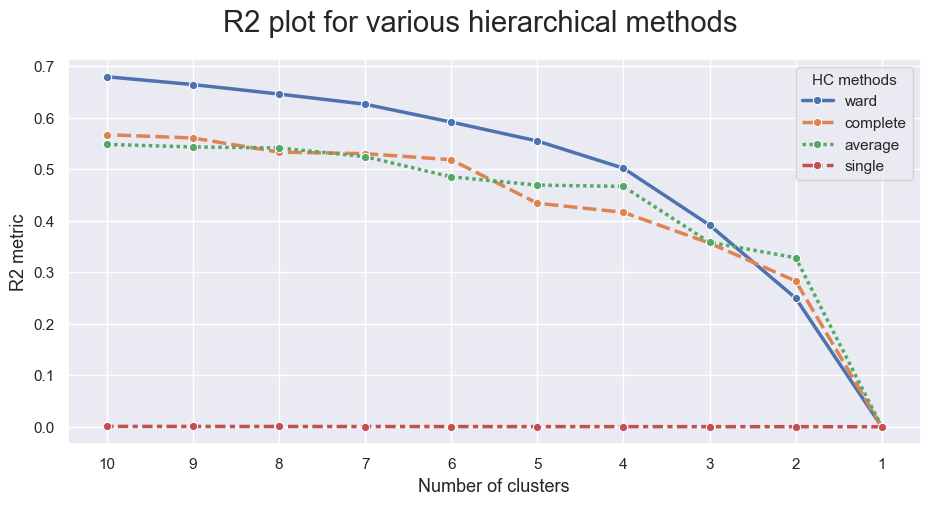

In [16]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=df_beh, link_method=link, max_nclus=max_nclus) 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

/var/folders/1v/g732xzmj3fq2t8__lcdf8r_40000gn/T/ipykernel_8294/2388915093.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_concat.groupby(by='labels').apply(get_ss)
/var/folders/1v/g732xzmj3fq2t8__lcdf8r_40000gn/T/ipykernel_8294/2388915093.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_concat.groupby(by='labels').apply(get_ss)
/var/folders/1v/g732xzmj3fq2t8__lcdf8r

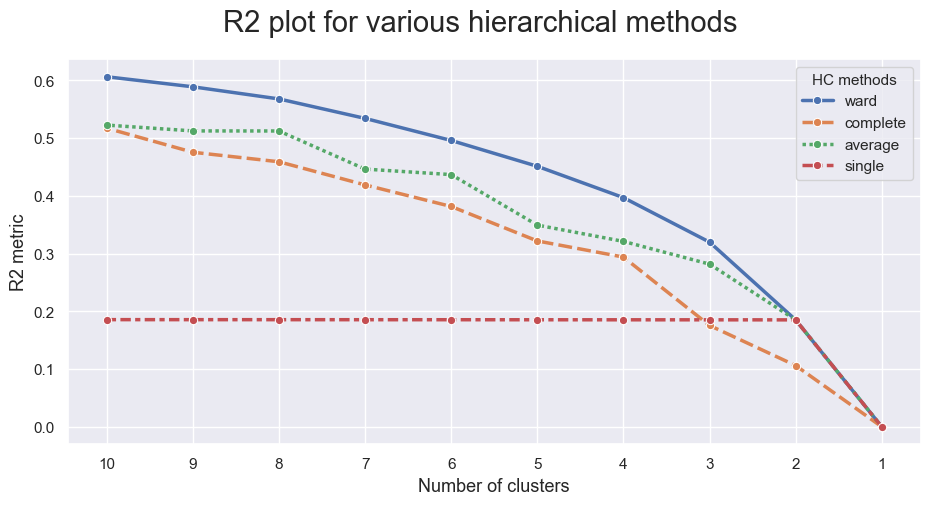

In [17]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=df_time, link_method=link, max_nclus=max_nclus) 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

/var/folders/1v/g732xzmj3fq2t8__lcdf8r_40000gn/T/ipykernel_8294/2388915093.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_concat.groupby(by='labels').apply(get_ss)
/var/folders/1v/g732xzmj3fq2t8__lcdf8r_40000gn/T/ipykernel_8294/2388915093.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw_labels = df_concat.groupby(by='labels').apply(get_ss)
/var/folders/1v/g732xzmj3fq2t8__lcdf8r

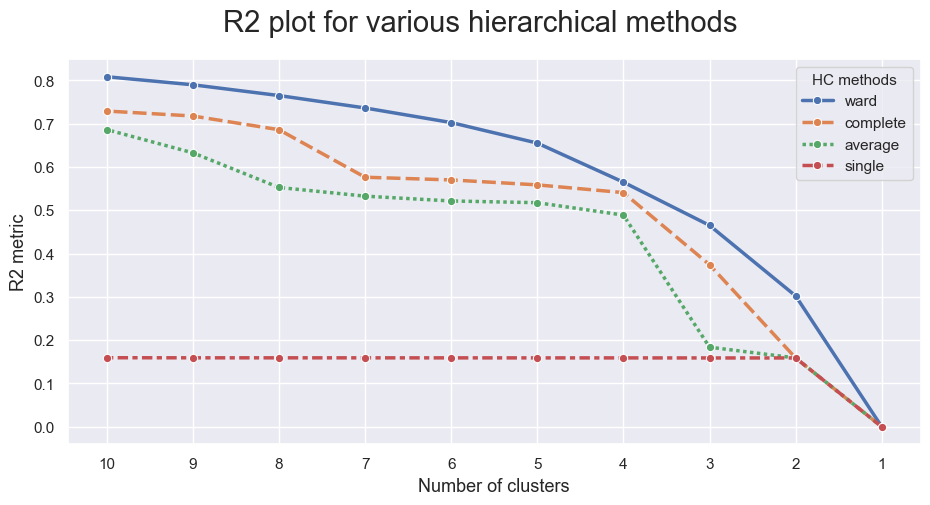

In [18]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=df_pref, link_method=link, max_nclus=max_nclus) 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

In [19]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(df_beh)

array([23727, 24085, 22383, ...,     6,     2,     0])

In [20]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(df_time)

array([31736, 31735, 23018, ...,     1,     2,     0])

In [21]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(df_pref)

array([18002, 19479, 31736, ...,     4,     1,     0])

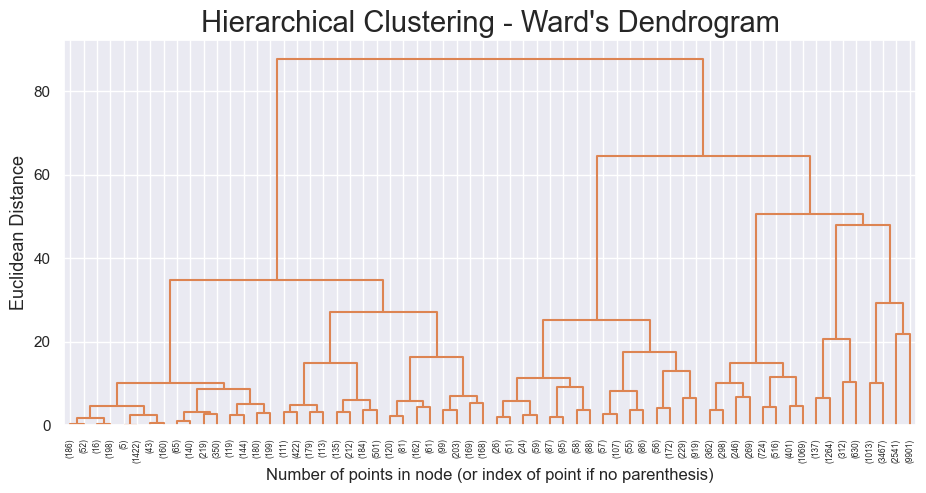

In [22]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 100
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

#### Test Cluster Solutions

In [ ]:
# 4 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc4lust = AgglomerativeClustering(linkage=linkage, metric=distance, n_clusters=4)
hc4_labels = hc4lust.fit_predict(df_beh)

In [ ]:
# Characterizing the 4 clusters
df_concat = pd.concat((df, pd.Series(hc4_labels, name='labels', index=df.index)), axis=1)
df_concat.groupby('labels').mean()

In [ ]:
cluster_means = df_concat.groupby('labels').mean()[df_beh].T
cluster_means.style.format(precision=2).background_gradient(axis=1)